In [1]:
#Sentiment_plots.ipynb

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.util import ngrams
from wordcloud import WordCloud

# Ensure plots are displayed inline in Jupyter
%matplotlib inline

# Set seaborn style for aesthetics
sns.set(style='whitegrid', context='talk', palette='muted')

# Step 1: Load Processed Data
file_path = 'processed_reviews_SentimentLabels.csv'  # Replace with the correct file path
print("Loading processed data...")
data = pd.read_csv(file_path)
data.head()


Loading processed data...


,listing_id,url,review_posted_date,review,language,review_expanded,review_cleaned_text,cleaned_review,initial_sentiment,sentiment_label
0,2595,https://www.airbnb.com/rooms/2595,2019-11-01,"Great location, convenient to everything. Very...",en,"Great location, convenient to everything. Very...",Great location convenient to everything Very c...,great location convenient everything very cool...,POSITIVE,1
1,2595,https://www.airbnb.com/rooms/2595,2019-05-01,Place was so cute and comfy! Host was great an...,en,Place was so cute and comfy! Host was great an...,Place was so cute and comfy Host was great and...,place cute comfy host great quick communicate ...,POSITIVE,1
2,2595,https://www.airbnb.com/rooms/2595,2019-05-01,10 / 10 would stay again,en,10 / 10 would stay again,10 10 would stay again,10 10 would stay,POSITIVE,1
3,2595,https://www.airbnb.com/rooms/2595,2019-01-01,The apartment met expectations to how it was i...,en,The apartment met expectations to how it was i...,The apartment met expectations to how it was i...,apartment met expectation insinuated ad jennif...,POSITIVE,1
4,2595,https://www.airbnb.com/rooms/2595,2018-12-01,Great space in a fun old building in NYC. Love...,en,Great space in a fun old building in NYC. Love...,Great space in a fun old building in NYC Loved...,great space fun old building nyc loved lightin...,POSITIVE,1


/var/folders/mw/mxvp53qs7zs38yfnzwg2ytcm0000gn/T/ipykernel_60578/79283199.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#FF6F61', '#6B5B95'])


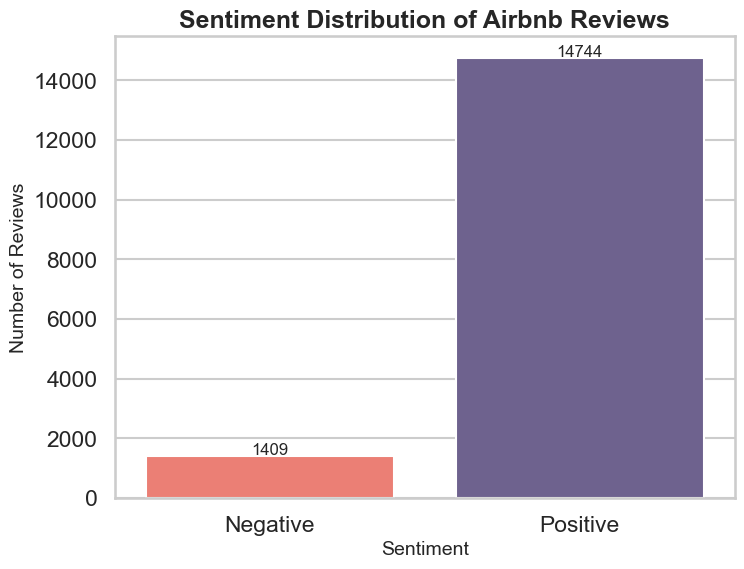

In [2]:
# Count the number of positive and negative sentiments
sentiment_counts = data['sentiment_label'].value_counts().sort_index()

# Map numerical labels to sentiment names
sentiment_counts.index = sentiment_counts.index.map({0: 'Negative', 1: 'Positive'})

# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#FF6F61', '#6B5B95'])

# Adding titles and labels
plt.title('Sentiment Distribution of Airbnb Reviews', fontsize=18, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)

# Annotate the bars with counts
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count + 50, f'{count}', ha='center', fontsize=12)

plt.show()


### Observation

- The bar chart visualizes the distribution of sentiments (positive and negative) in the Airbnb reviews.  
- Positive reviews dominate, with a significantly higher count compared to negative reviews.  
- The disparity suggests a general trend of favorable feedback in the dataset.


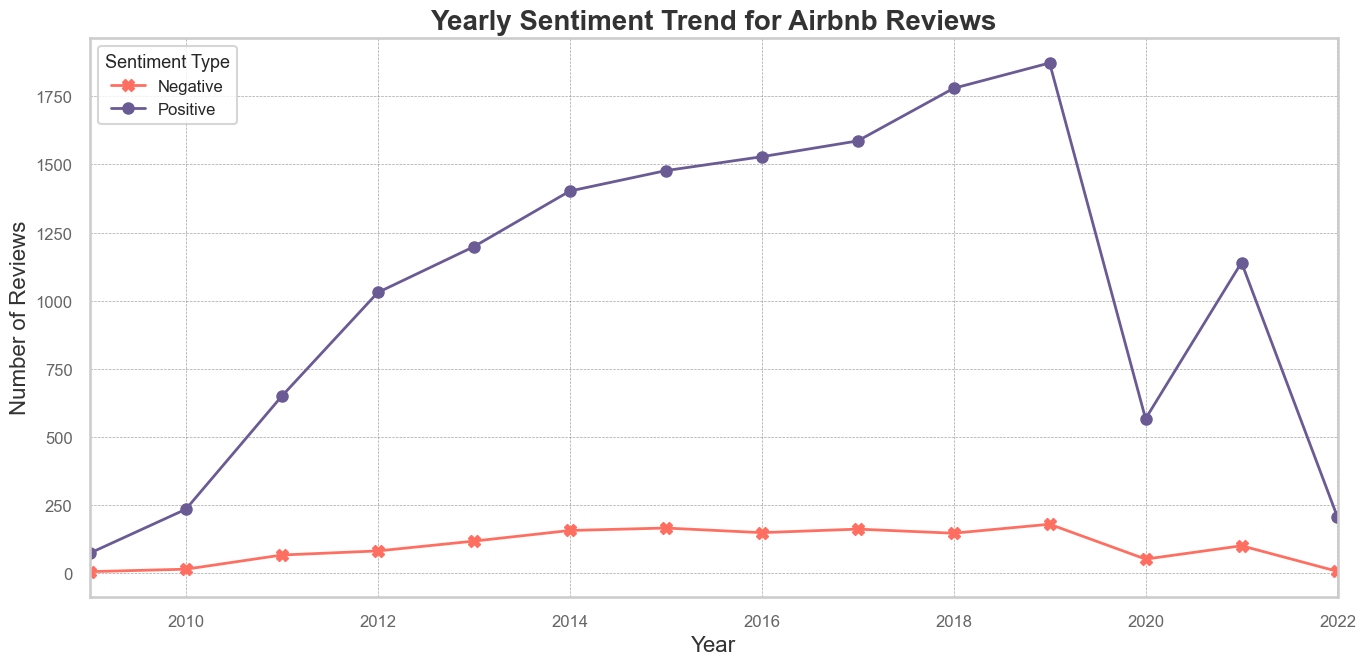

In [3]:
# Ensure 'review_posted_date' is in datetime format
data['review_posted_date'] = pd.to_datetime(data['review_posted_date'])

# Extract year for grouping
data['year'] = data['review_posted_date'].dt.to_period('Y')

# Group by year and sentiment
sentiment_over_year = data.groupby(['year', 'sentiment_label']).size().unstack(fill_value=0)
sentiment_over_year.columns = sentiment_over_year.columns.map({0: 'Negative', 1: 'Positive'})

# Plotting the time series by year
plt.figure(figsize=(14, 7))
ax = plt.gca()  # Get current axis

# Color and style settings for yearly data
colors = {'Positive': '#6B5B95', 'Negative': '#FF6F61'}
marker_styles = {'Positive': 'o', 'Negative': 'X'}

# Plot each column with custom settings
for column in sentiment_over_year.columns:
    sentiment_over_year[column].plot(
        kind='line',
        marker=marker_styles[column],
        color=colors[column],
        ax=ax,
        linewidth=2,
        markersize=8,
        label=column
    )

# Adding titles and labels with enhanced formatting
plt.title('Yearly Sentiment Trend for Airbnb Reviews', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('Year', fontsize=16, color='#333333')
plt.ylabel('Number of Reviews', fontsize=16, color='#333333')
plt.xticks(rotation=0, fontsize=12, color='#666666')
plt.yticks(fontsize=12, color='#666666')

# Adding a grid
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Enhance legend
plt.legend(title="Sentiment Type", title_fontsize='13', fontsize='12', loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Observation

The line chart illustrates the yearly trend in sentiment distribution for Airbnb reviews:

1. **Positive Sentiment**:
   - Positive reviews consistently dominate across all years.
   - The trend shows a gradual increase in the number of positive reviews, indicating an improvement in customer satisfaction or an increase in Airbnb usage over time.

2. **Negative Sentiment**:
   - Negative reviews remain relatively low throughout the years.
   - There is slight fluctuation, but no significant spikes are observed, suggesting consistent service quality.

3. **Overall Trends**:
   - The consistent growth in both positive and total reviews implies that Airbnb listings are gaining popularity.
   - The steady gap between positive and negative sentiments highlights a continued preference for leaving positive feedback.


/var/folders/mw/mxvp53qs7zs38yfnzwg2ytcm0000gn/T/ipykernel_60578/1539694606.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts_pos), y=bigrams_pos, palette=colors)


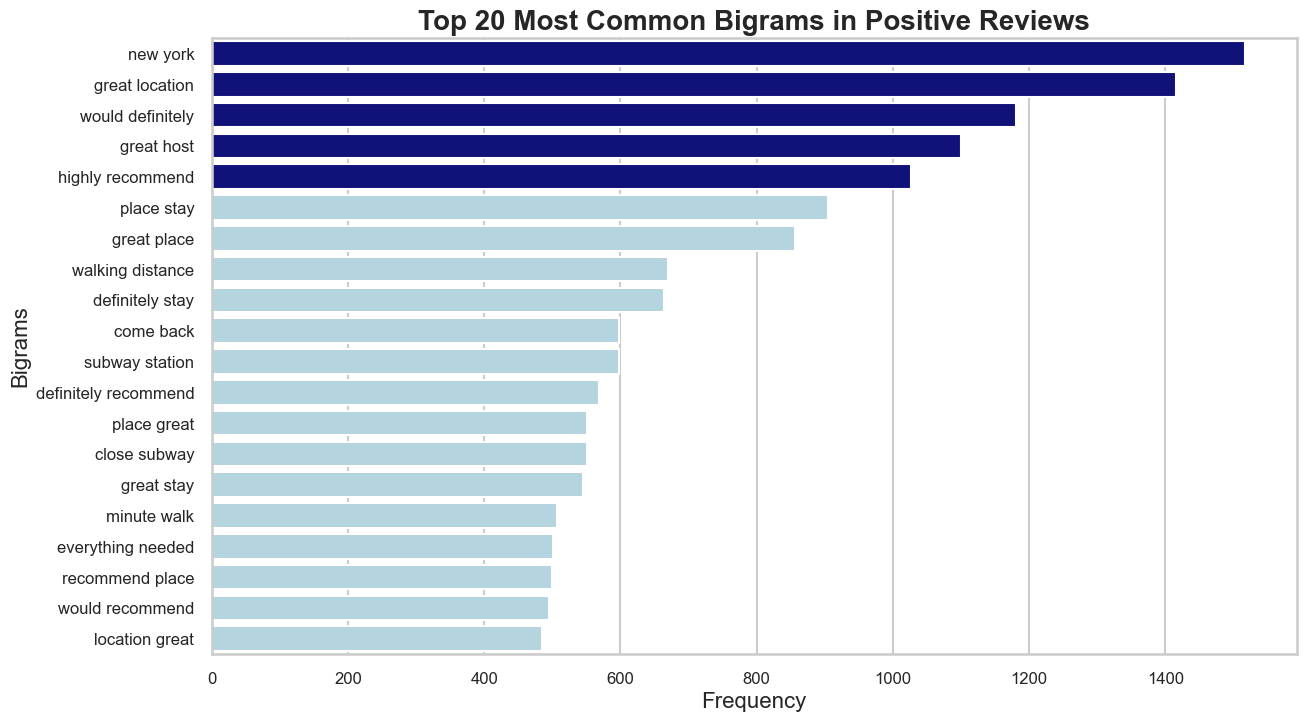

In [5]:
# Filter data to include only positive reviews
positive_reviews = data[data['sentiment_label'] == 1]['cleaned_review']

# Combine all reviews into one large text
positive_text = " ".join(review for review in positive_reviews)


# Re-define positive_words assuming positive_text is already defined and contains all the positive reviews concatenated
stop_words = set(stopwords.words('english'))  # Ensure stopwords are defined
positive_words = [word for word in positive_text.split() if word.lower() not in stop_words]

# Get bigrams from positive reviews
positive_bigrams = list(ngrams(positive_words, 2))
positive_bigram_counts = Counter(positive_bigrams).most_common(20)

# Unzip the bigram counts for easier plotting
bigrams_pos, counts_pos = zip(*positive_bigram_counts)
bigrams_pos = [' '.join(bigram) for bigram in bigrams_pos]

# Define colors for the plot: top 3 in dark blue, others in light blue
colors = ['darkblue' if i < 5 else 'lightblue' for i in range(len(counts_pos))]

# Create the bar chart for positive bigrams with enhanced styling
plt.figure(figsize=(14, 8))
sns.barplot(x=list(counts_pos), y=bigrams_pos, palette=colors)
plt.title('Top 20 Most Common Bigrams in Positive Reviews', fontsize=20, fontweight='bold')
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Bigrams', fontsize=16)
plt.xticks(fontsize=12)  # Adjust font size for x-axis labels
plt.yticks(fontsize=12)  # Adjust font size for y-axis labels
plt.show()


### Observation

The bar chart showcases the top 20 most common bigrams in positive reviews across the dataset:

   - Common bigrams such as "great location," "would definitely," and "great host" reflect key qualities that resonate positively with customers.

   - Phrases like "great host" emphasize the importance of the host's role in creating a positive experience for guests.

   - Phrases such as "would definitely" and "highly recommend" indicate strong guest satisfaction and willingness to recommend or revisit.

   - The plot effectively highlights the top bigrams with distinct coloring for the most frequent ones, making the chart aesthetically pleasing and easy to interpret.

This analysis underscores critical aspects that lead to positive reviews, providing valuable insights for improving and maintaining guest satisfaction.


/var/folders/mw/mxvp53qs7zs38yfnzwg2ytcm0000gn/T/ipykernel_60578/4125858980.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts_neg), y=bigrams_neg, palette=colors_neg)


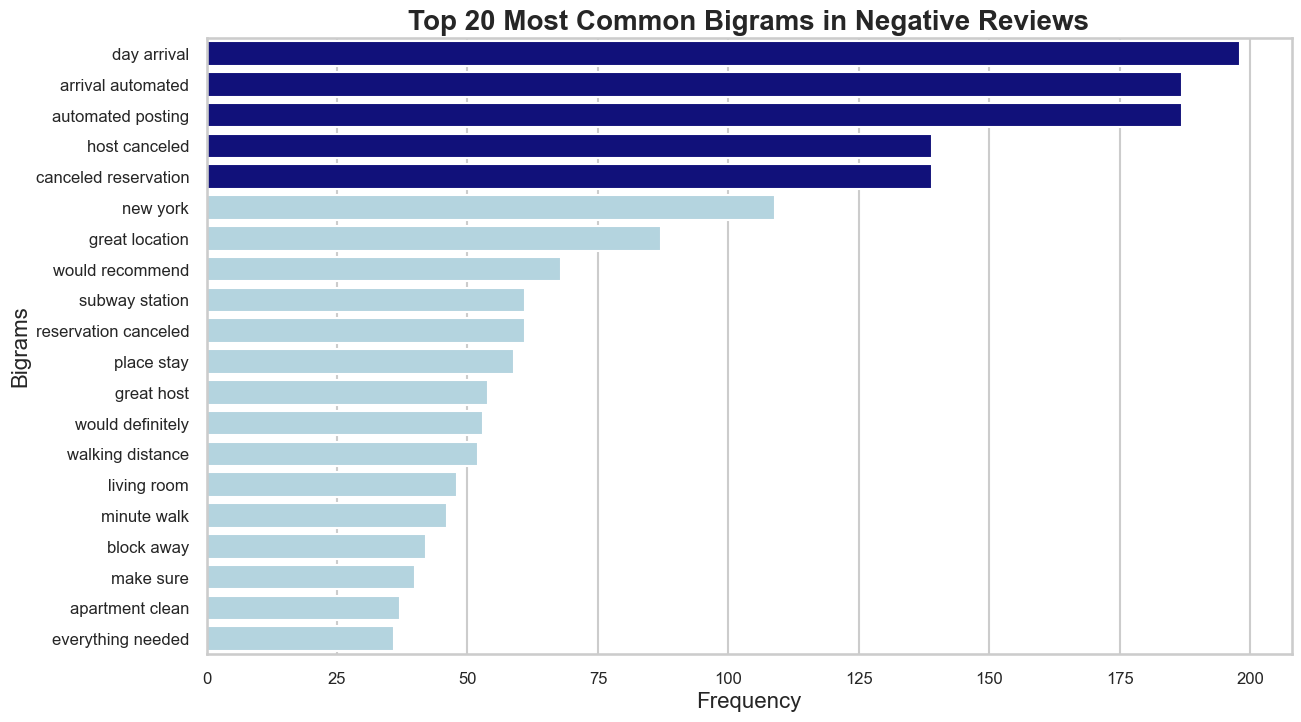

In [6]:
# Extract negative reviews
negative_reviews = data[data['sentiment_label'] == 0]['cleaned_review'] 

# Concatenate all negative reviews into one large text string
negative_text = ' '.join(review for review in negative_reviews)

# Define stopwords
stop_words = set(stopwords.words('english'))

# Split the negative text into words and filter out the stopwords
negative_words = [word for word in negative_text.split() if word.lower() not in stop_words]

# Generate bigrams from the list of words
negative_bigrams = list(ngrams(negative_words, 2))

# Count and extract the top 20 most common bigrams
negative_bigram_counts = Counter(negative_bigrams).most_common(20)

# Unpack the bigrams and their counts for plotting
bigrams_neg, counts_neg = zip(*negative_bigram_counts)
bigrams_neg = [' '.join(bigram) for bigram in bigrams_neg]

# Define colors for the plot: top 5 in dark blue, others in light blue
colors_neg = ['darkblue' if i < 5 else 'lightblue' for i in range(len(counts_neg))]

# Create the bar chart for negative bigrams with enhanced styling
plt.figure(figsize=(14, 8))
sns.barplot(x=list(counts_neg), y=bigrams_neg, palette=colors_neg)
plt.title('Top 20 Most Common Bigrams in Negative Reviews', fontsize=20, fontweight='bold')
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Bigrams', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Observation

The bar chart highlights the top 20 most frequent bigrams in negative reviews:

   - Common bigrams like "host cancelled," canceled reservation"," and "automated posting" reflect typical areas of dissatisfaction among customers.

   - Comparing these results with positive bigrams provides a clearer understanding of what distinguishes satisfied customers from dissatisfied ones.

   - Hosts and property managers can focus on addressing the specific issues highlighted in these bigrams, such as host cancelled and canceled reservation, to mitigate negative feedback.

The analysis offers a targeted approach for enhancing customer satisfaction by addressing these identified concerns.


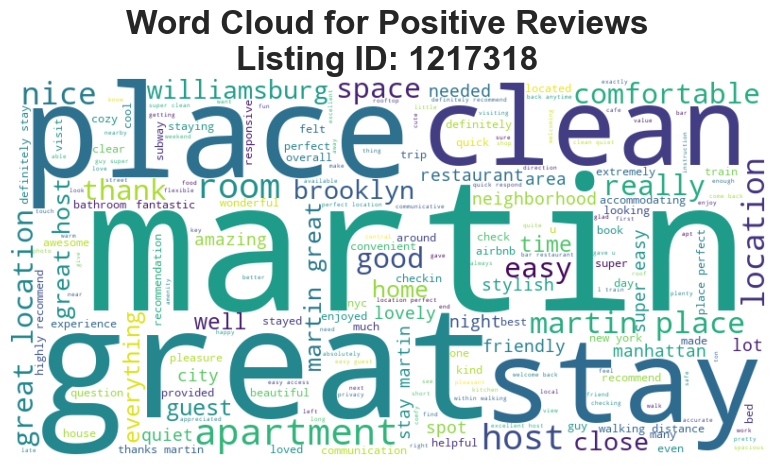

In [7]:
# Recreate the positive text for the most reviewed listing if not previously defined
most_reviewed_listing = data['listing_id'].value_counts().idxmax()

# Filter positive reviews for the most reviewed listing
positive_reviews_filtered = data[(data['listing_id'] == most_reviewed_listing) & 
                                 (data['sentiment_label'] == 1)]['cleaned_review']

# Combine all positive reviews into a single string
positive_text_filtered = " ".join(review for review in positive_reviews_filtered)

# Generate the word cloud
wordcloud_positive = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis'
).generate(positive_text_filtered)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')  # Hide axis details
plt.title(f'Word Cloud for Positive Reviews\nListing ID: {most_reviewed_listing}', fontsize=24, fontweight='bold')
plt.tight_layout()
plt.show()


### Observation

The word cloud represents the most commonly used words in positive reviews for the listing with the highest number of reviews:

   - Words like "great," "stay," "place," "clean," and "martin(host)" are prominent, indicating their significance in shaping positive reviews.

   - Guests frequently praise the cleanliness, quality of the space, and the hospitality of the host.
   - The visual emphasizes elements like comfort, cleanliness, and location, which are likely the key drivers of satisfaction.

This analysis offers valuable insights for maintaining high guest satisfaction and ensuring a positive guest experience for this listing.
